# Multiple linear regression excercises

$Y_{i} = \beta_{0} + \beta_{1} X_{i} + \beta_{2} X_{i} + \beta_{3} X_{i} + \epsilon_{i}$

- $Y_{i}$: the dependent (random) variable 
- $X_{i}$: independent variable (not random)
- $\beta_{0}, \beta_{1}...$: model parameters 
- $\epsilon_{i}$: Random error, how the observation deviates from the population mean

In [1]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

## Task 1
Use LinearRegression from SciPy to predict global signal from 3 rotations and 3 translation parameters. Which motion parameter has highest beta value?

In [3]:
# Load confounds table
confounds_path = "../data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"
confounds = pd.read_csv(confounds_path, delimiter="\t")

# Print confounds column names


Index(['csf', 'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       'white_matter_derivative1_power2', 'white_matter_power2',
       'global_signal', 'global_signal_derivative1',
       ...
       'rot_x_derivative1_power2', 'rot_x_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2',
       'rot_z_power2'],
      dtype='object', length=178)

In [4]:
# Load confounds table
confounds_path = "../data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"
confounds = pd.read_csv(confounds_path, delimiter="\t")

# Print confounds column names
print(confounds.columns)

Index(['csf', 'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       'white_matter_derivative1_power2', 'white_matter_power2',
       'global_signal', 'global_signal_derivative1',
       ...
       'rot_x_derivative1_power2', 'rot_x_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2',
       'rot_z_power2'],
      dtype='object', length=178)


In [5]:
# Filter dataframe to store only 6 motion parameters
# 筛选出6个基本运动参数
motion_params = confounds.filter(
    regex='^trans_[xyz]$|^rot_[xyz]$'
)
print(motion_params.head())


# Filter dataframe to store global signal
global_signal = confounds[['global_signal']]
print(global_signal.head())


    trans_x   trans_y   trans_z     rot_x     rot_y     rot_z
0 -0.000081 -0.060488 -0.186893  0.002502 -0.000822 -0.000621
1 -0.000095 -0.017757 -0.097059  0.001619 -0.000964 -0.000202
2 -0.000099  0.000539 -0.050085  0.001288 -0.000964 -0.000246
3 -0.006923  0.023834 -0.036712  0.001190 -0.000884  0.000039
4  0.007688  0.016427  0.015656  0.000609 -0.000964  0.000216
   global_signal
0     526.516821
1     521.348217
2     518.360918
3     518.386814
4     518.626567


In [8]:
# Fit multiple linear regression model 
linear_regression = LinearRegression()
linear_regression.fit(motion_params, global_signal)

LinearRegression()

In [9]:
# Print regression coefficients and intercept
betas = linear_regression.coef_
intercept = linear_regression.intercept_

print("每个头动参数的β值：", betas)
print("截距：", intercept)

每个头动参数的β值： [[  -11.12573944    -2.92628293   -12.82090256 -1285.13488422
   -139.39206312   721.33740063]]
截距： [522.10374583]


## Task 2
Use LinearRegression from SciPy to predict harry potter from other book characters. Which character has highest beta value?

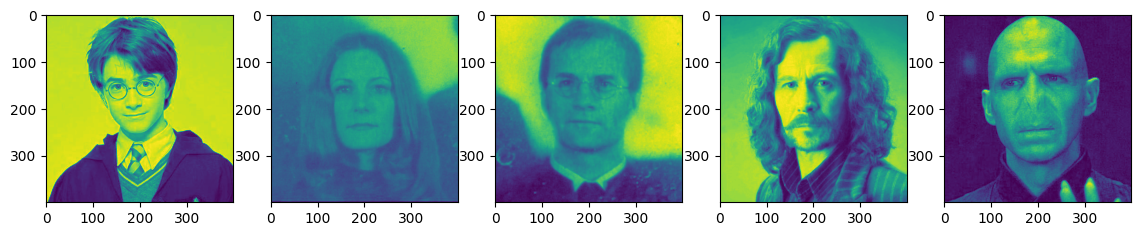

In [10]:
# Load characters
harry = np.load("../data/harry.npy")
lilly = np.load("../data/lilly.npy")
james = np.load("../data/james.npy")
syrius = np.load("../data/syrius.npy")
voldemort = np.load("../data/voldemort.npy")

# Plot photos of all character on one plot
characters = [harry, lilly, james, syrius, voldemort]
fig, ax = plt.subplots(1,5, figsize = (14,25))

for i in range(len(characters)):
    ax[i].imshow(characters[i])

In [11]:
# Make matrix of characters (remember to change matrices to vectors and transpose). Use np.vstack.
characters_matrix = []

# 把每个角色的图像展平后堆叠成矩阵
characters_matrix = []

# 用 for 循环展平并添加到列表
for char in characters:       # characters 是你前面定义的 [harry, lilly, james, syrius, voldemort]
    characters_matrix.append(char.ravel())  # .ravel() 把矩阵展平为一维向量

# 用 np.vstack 堆叠成二维矩阵
characters_matrix = np.vstack(characters_matrix)

# 打印矩阵形状
print("characters_matrix shape:", characters_matrix.shape)

characters_matrix shape: (5, 160000)


In [12]:
# Transpose matrix
# 转置矩阵
characters_matrix_T = characters_matrix.T

# Print shape of matrix
# 打印转置后矩阵形状
print("Transposed matrix shape:", characters_matrix_T.shape)

Transposed matrix shape: (160000, 5)


In [14]:
# Run multiple linear regression

# 假设 characters_matrix_T 已经是 (像素数, 5) 的矩阵
# 第1列是 Harry, 其他列是其他角色
y = characters_matrix_T[:, 0]    # Harry
X = characters_matrix_T[:, 1:]   # Lilly, James, Syrius, Voldemort

# 拟合线性回归
model = LinearRegression()
model.fit(X, y)



LinearRegression()

In [15]:
# Print regression coefficients
# 打印回归系数和截距
betas = model.coef_
intercept = model.intercept_
print("回归系数 β:", betas)
print("截距 β0:", intercept)

# 找出 β 值最大的角色
characters_names = ['Lilly', 'James', 'Syrius', 'Voldemort']
max_idx = np.argmax(np.abs(betas))
print(f"β值最大的角色是: {characters_names[max_idx]} (β = {betas[max_idx]:.4f})")



回归系数 β: [ 0.30350441  0.83204686  0.2543541  -0.08258658]
截距 β0: -24.62380027086664
β值最大的角色是: James (β = 0.8320)


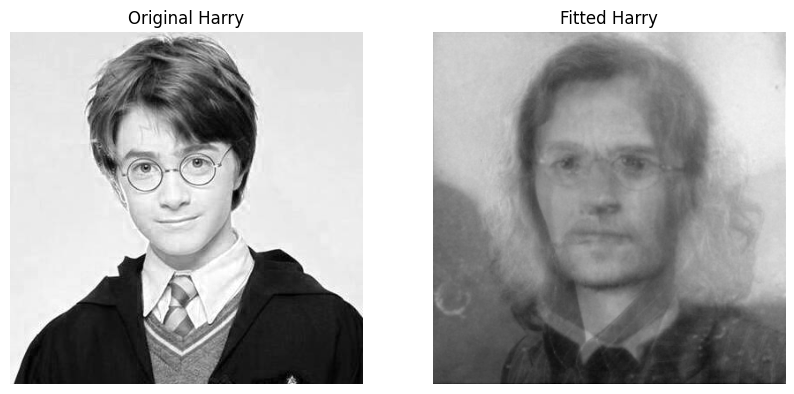

In [16]:
# Calculate fitted harry
# Plot original and fitted harry side-by-side

# 计算拟合的 Harry（用回归模型预测）
fitted_harry = model.predict(X)  # (像素数, )

# 把一维向量重新 reshape 成原始图像形状
harry_shape = harry.shape  # 原始 Harry 图像形状
fitted_harry_img = fitted_harry.reshape(harry_shape)

# 并排画图
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 原始 Harry
axes[0].imshow(harry, cmap='gray')
axes[0].set_title('Original Harry')
axes[0].axis('off')

# 拟合 Harry
axes[1].imshow(fitted_harry_img, cmap='gray')
axes[1].set_title('Fitted Harry')
axes[1].axis('off')

plt.show()